<a href="https://colab.research.google.com/github/Viswesh934/AI-mental-fitness-tracker/blob/main/AI_Mental_Fitness_Tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AI** **Mental** **Fitness** **Tracker**


*   This notebook deals with the mental fitness using different machune learning algorithms




**Data overview**:We used two data sets one relates to prevalence and other related to their share in diseases and mental disorders

# Importing libraries


In [ ]:
import warnings #ignores warnings when performing tests
warnings.filterwarnings('ignore')
import pandas as pd #mainly used for working with relational or labeled data
import numpy as np # used for working with arrays

In [ ]:
from google.colab import drive #importing data from drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import seaborn as sns #uses Matplotlib underneath to plot graphs
import matplotlib.pyplot as plt #collection of functions that make matplotlib work like MATLAB
import plotly.express as ps #contains functions that can create entire figures at once



# Exploratory Data Analysis

Load and Prepare the data

In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/mental-and-substance-use-as-share-of-disease.csv') #To access share of diseases data
df2 =pd.read_csv('/content/drive/MyDrive/prevalence-by-mental-and-substance-use-disorder.csv') #To access prev

In [ ]:
df1.head()

,Entity,Code,Year,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,AFG,1990,1.696670
1,Afghanistan,AFG,1991,1.734281
2,Afghanistan,AFG,1992,1.791189
3,Afghanistan,AFG,1993,1.776779
4,Afghanistan,AFG,1994,1.712986


In [ ]:
df2.head()

,Entity,Code,Year,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)
0,Afghanistan,AFG,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036
1,Afghanistan,AFG,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250
2,Afghanistan,AFG,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501
3,Afghanistan,AFG,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958
4,Afghanistan,AFG,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779


In [ ]:
data=pd.merge(df2,df1)
data.head(13)

,Entity,Code,Year,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent),DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,AFG,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,1.696670
1,Afghanistan,AFG,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250,1.734281
2,Afghanistan,AFG,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501,1.791189
3,Afghanistan,AFG,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958,1.776779
4,Afghanistan,AFG,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779,1.712986
5,Afghanistan,AFG,1995,0.224713,0.716686,0.111129,4.780851,0.428578,5.098495,0.445422,1.738272
6,Afghanistan,AFG,1996,0.223690,0.716388,0.107786,4.777272,0.426393,5.100580,0.444837,1.778098
7,Afghanistan,AFG,1997,0.222424,0.716143,0.103931,4.775242,0.423720,5.105474,0.443938,1.781815
8,Afghanistan,AFG,1998,0.221129,0.716139,0.100343,4.777377,0.422491,5.113707,0.442665,1.729402
9,Afghanistan,AFG,1999,0.220065,0.716323,0.097946,4.782067,0.421215,5.120480,0.441428,1.850988


# Data Cleaning

In [ ]:
data.isnull().sum() #missing values in dataset

Entity                                                                                               0
Code                                                                                               690
Year                                                                                                 0
Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)                             0
Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)                          0
Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)                          0
Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)                         0
Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)                        0
Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)                      0
Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (P

In [ ]:
data.drop('Code',axis=1,inplace=True) #dropping columns

In [ ]:
data.head(10) #viewing data

,Entity,Year,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent),DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,1.696670
1,Afghanistan,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250,1.734281
2,Afghanistan,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501,1.791189
3,Afghanistan,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958,1.776779
4,Afghanistan,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779,1.712986
5,Afghanistan,1995,0.224713,0.716686,0.111129,4.780851,0.428578,5.098495,0.445422,1.738272
6,Afghanistan,1996,0.223690,0.716388,0.107786,4.777272,0.426393,5.100580,0.444837,1.778098
7,Afghanistan,1997,0.222424,0.716143,0.103931,4.775242,0.423720,5.105474,0.443938,1.781815
8,Afghanistan,1998,0.221129,0.716139,0.100343,4.777377,0.422491,5.113707,0.442665,1.729402
9,Afghanistan,1999,0.220065,0.716323,0.097946,4.782067,0.421215,5.120480,0.441428,1.850988


In [ ]:
data.size,data.shape #properties of data

(68400, (6840, 10))

In [ ]:
#new column names
data.set_axis(['country','year','Schizophrenia','Bipolar_disorder','Eating_disorder','Anxiety','Drug_users','Depression','Alcohol','Mental_fitness'],axis='columns',inplace=True)

In [ ]:
data.head(10)

,country,year,Schizophrenia,Bipolar_disorder,Eating_disorder,Anxiety,Drug_users,Depression,Alcohol,Mental_fitness
0,0,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,1.696670
1,0,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250,1.734281
2,0,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501,1.791189
3,0,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958,1.776779
4,0,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779,1.712986
5,0,1995,0.224713,0.716686,0.111129,4.780851,0.428578,5.098495,0.445422,1.738272
6,0,1996,0.223690,0.716388,0.107786,4.777272,0.426393,5.100580,0.444837,1.778098
7,0,1997,0.222424,0.716143,0.103931,4.775242,0.423720,5.105474,0.443938,1.781815
8,0,1998,0.221129,0.716139,0.100343,4.777377,0.422491,5.113707,0.442665,1.729402
9,0,1999,0.220065,0.716323,0.097946,4.782067,0.421215,5.120480,0.441428,1.850988


# Data Visualization

[]

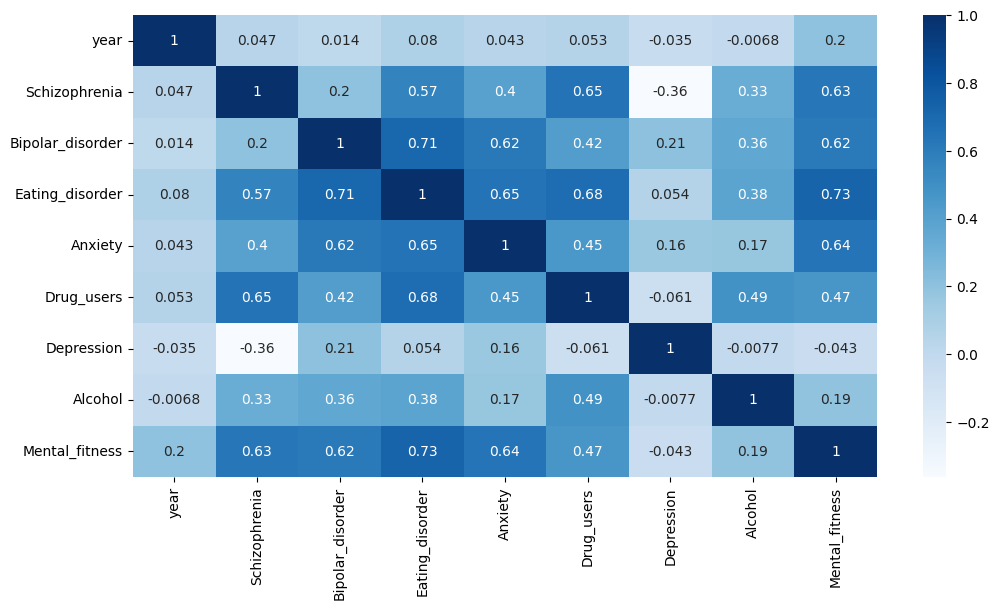

In [ ]:
plt.figure(figsize=(12,6)) #Visualizing data in heat maps
sns.heatmap(data.corr(),annot=True,cmap='Blues')
plt.plot()

[]

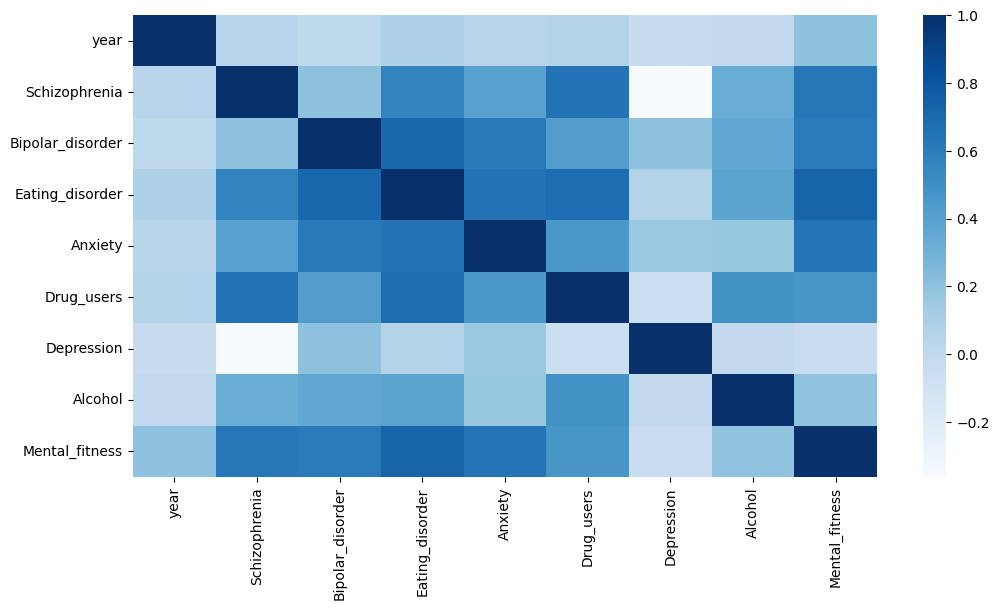

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=False,cmap='Blues') #Just to show the difference between correlation and no correlation
plt.plot()

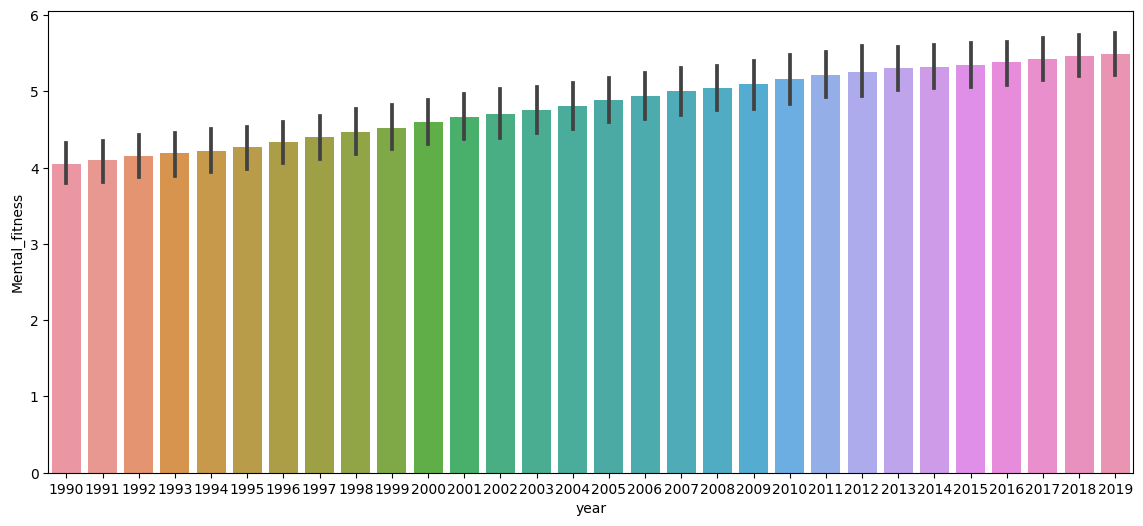

In [ ]:
plt.figure(figsize=(14,6)) #Plotting mental fitness over the years
sns.barplot(x='year', y='Mental_fitness',data=data)
plt.show()

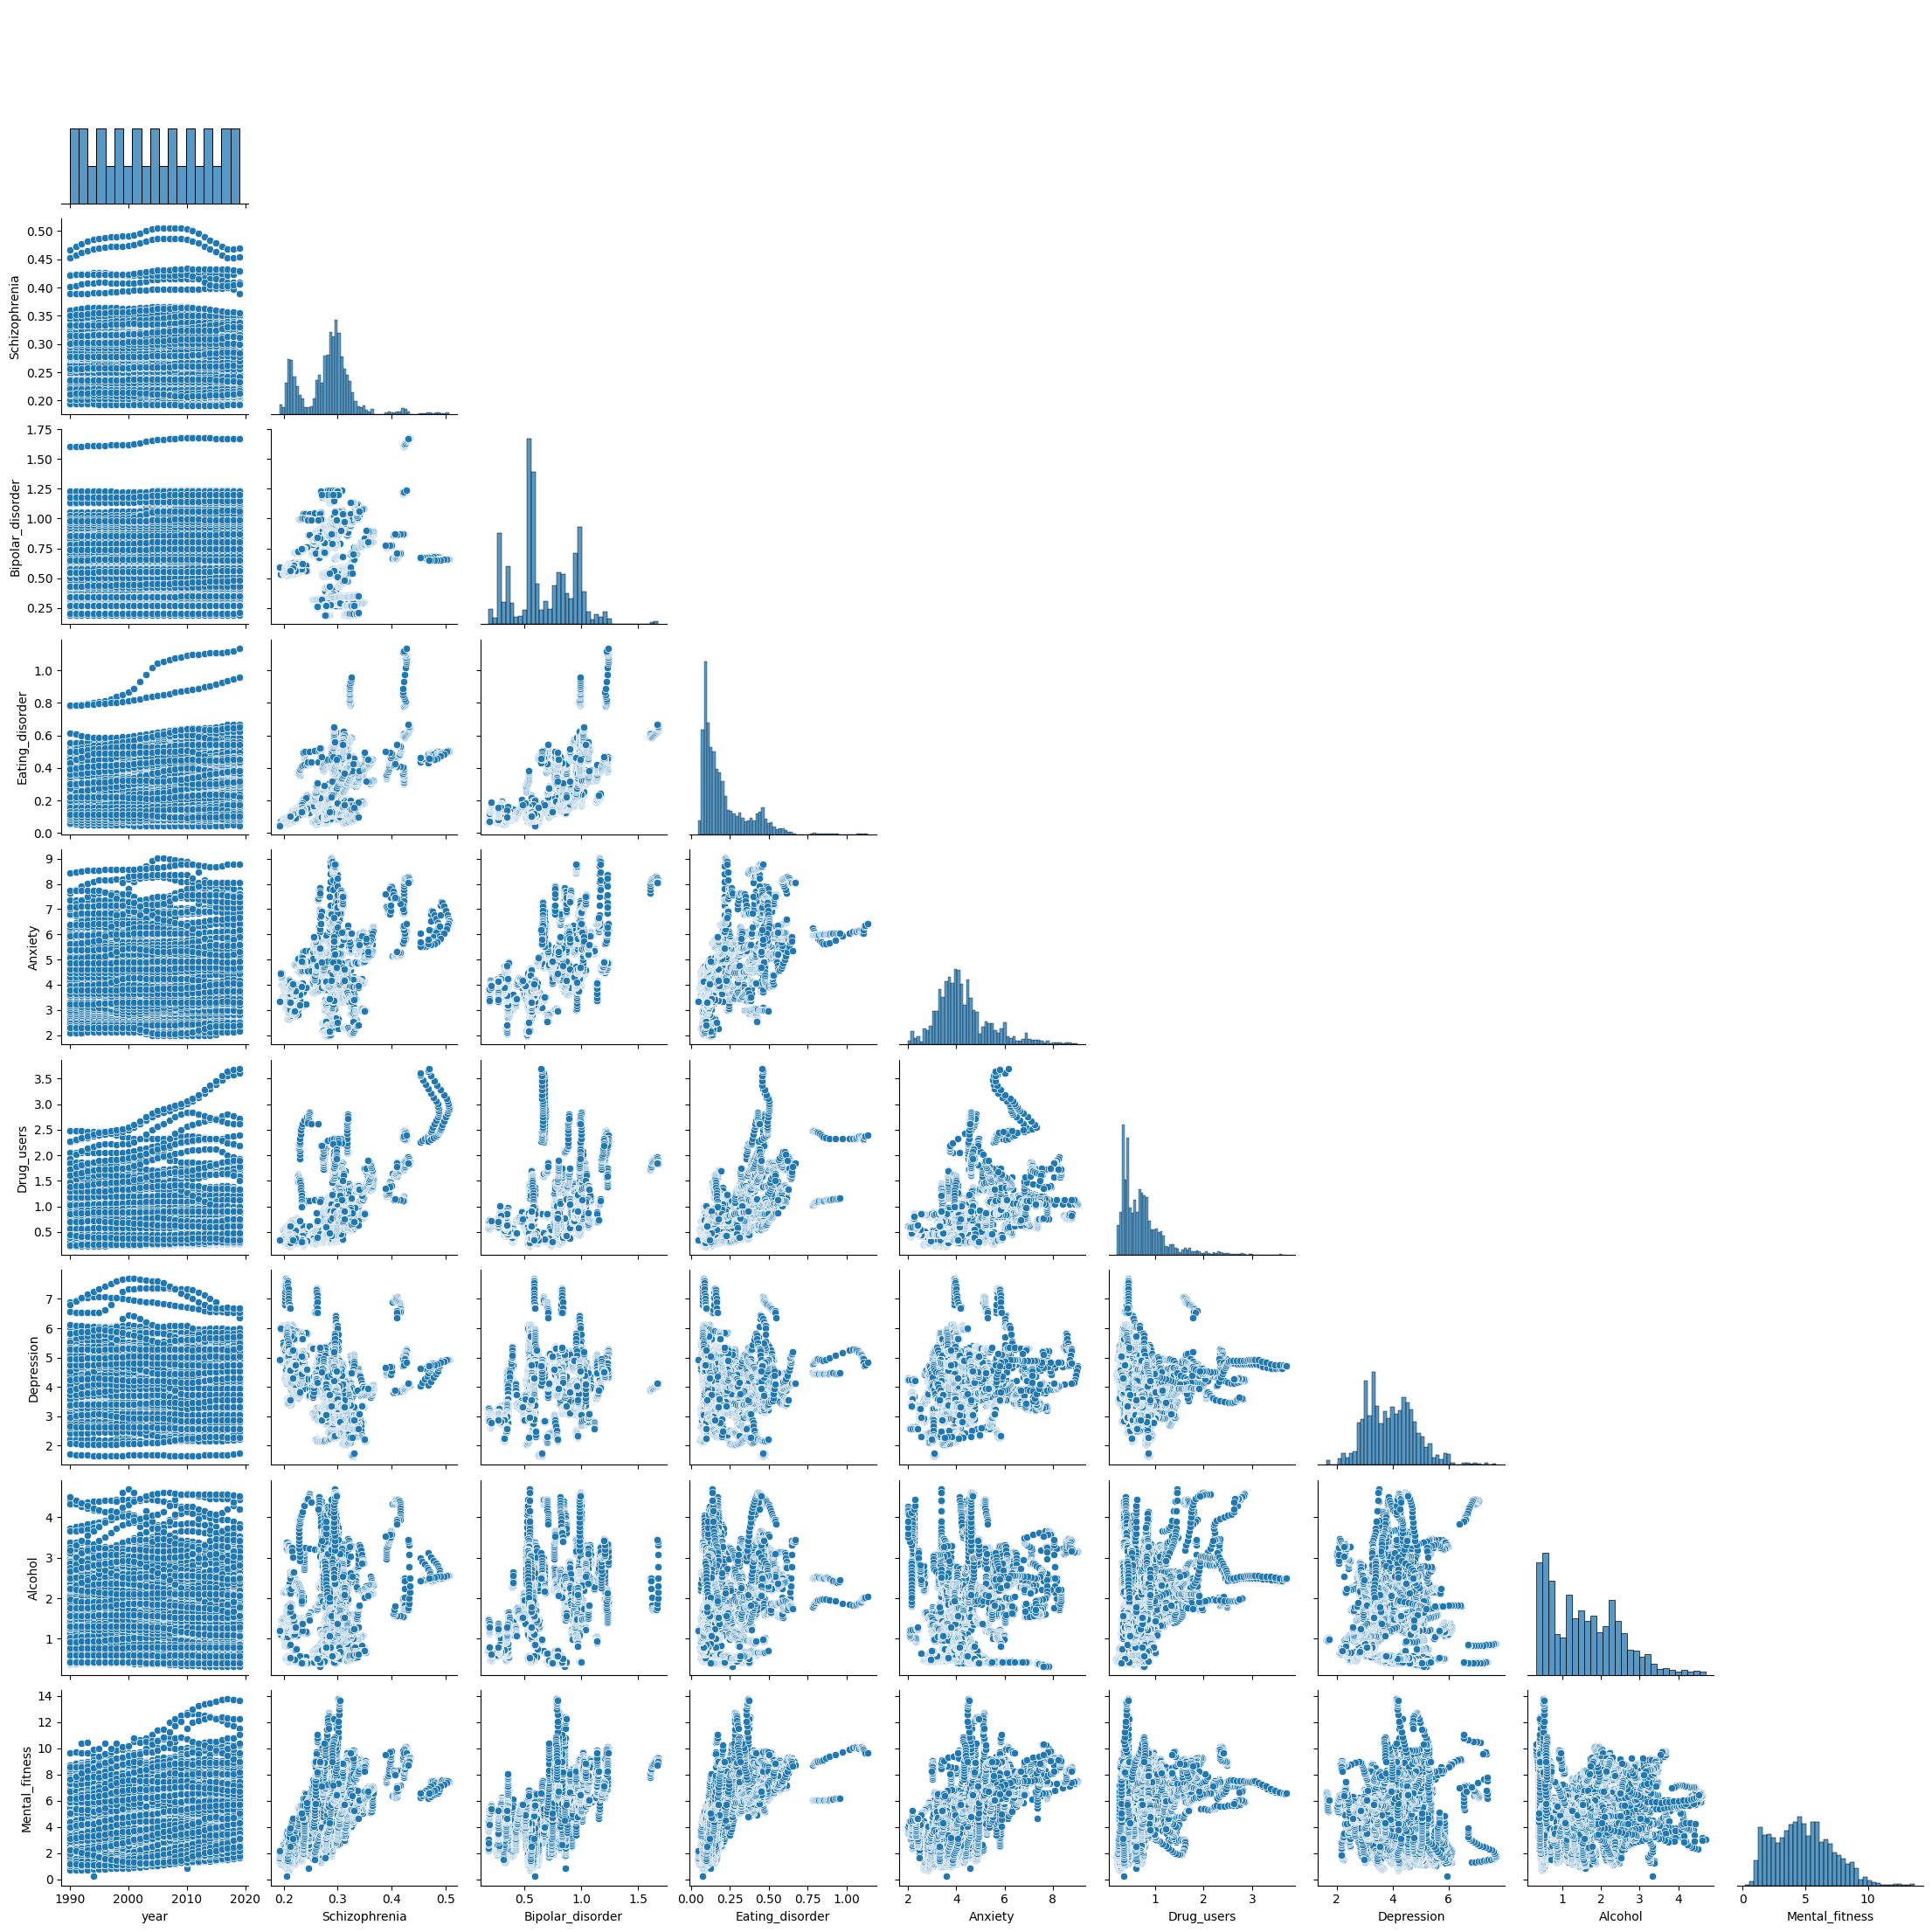

In [ ]:
sns.pairplot(data,corner=True) #scatter plots for the data set
plt.show()

In [ ]:
mean=data['Mental_fitness'].mean()
mean

4.8180618117506135

In [ ]:
fig=ps.pie(data,values='Mental_fitness',names='year')
fig.show()

In [ ]:
fig=ps.line(data,x='year',y='Mental_fitness',color='country',markers=True,color_discrete_sequence=['red','blue'],template='plotly_dark')
fig.show()

# Data Conversion or Transformations

In [ ]:
df=data #copy data into df

In [ ]:
df.info() #info about the data set

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6840 entries, 0 to 6839
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           6840 non-null   object 
 1   year              6840 non-null   int64  
 2   Schizophrenia     6840 non-null   float64
 3   Bipolar_disorder  6840 non-null   float64
 4   Eating_disorder   6840 non-null   float64
 5   Anxiety           6840 non-null   float64
 6   Drug_users        6840 non-null   float64
 7   Depression        6840 non-null   float64
 8   Alcohol           6840 non-null   float64
 9   Mental_fitness    6840 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 587.8+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder #Transform non numeric labels to numeric labels
l=LabelEncoder() #Normalization of labels
for i in df.columns:
    if df[i].dtype=='object': #comparing numeric and non numeric labels
        df[i]=l.fit_transform(df[i])

In [ ]:
df.shape

(6840, 10)

# Data splitting


*   In this step we are going to split data into two parts they are training and testing
*   well take 80% of data for x for training and 20% for testing



In [ ]:
x=df.drop('Mental_fitness',axis='columns')
y=df['Mental_fitness']
from sklearn.model_selection import train_test_split #split original data into two states
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=20,random_state=2) #random state 2 to ensure test splits are deterministic

In [ ]:
x
y


0       1.696670
1       1.734281
2       1.791189
3       1.776779
4       1.712986
          ...   
6835    2.193166
6836    2.279813
6837    2.364265
6838    2.472949
6839    2.525892
Name: Mental_fitness, Length: 6840, dtype: float64

In [ ]:
print('xtrain',xtrain.shape)
print('xtest',xtest.shape)
print('ytrain',ytrain.shape)
print('ytest',ytest.shape)

xtrain (6820, 9)
xtest (20, 9)
ytrain (6820,)
ytest (20,)


# Model Training

Model training is the primary step in machine learning, resulting in a working model that can then be validated, tested and deployed. The model’s performance during training will eventually determine how well it will work when it is eventually put into an application for the end-users.

Both the quality of the training data and the choice of the algorithm are central to the model training phase. In most cases, training data is split into two sets for training and then validation and testing.

The selection of the algorithm is primarily determined by the end-use case. However, there are always additional factors that need to be considered, such as algorithm-model complexity, performance, interpretability, computer resource requirements, and speed. Balancing out these various requirements can make selecting algorithms an involved and complicated process.



**Select Algorithms to Test**:

In machine learning, there are thousands of algorithms to choose from, and there is no sure way to determine which will be the best for any specific model. In most cases, you will likely try dozens, if not hundreds, of algorithms in order to find the one that results in an accurate working model. Selecting candidate algorithms will often depend on:


*  Size of the training data.
*  Accuracy and interpretability of the required output.
*  Speed of training time required, which is inversely proportional to accuracy.
*   Linearity of the training data.
*   Number of features in the data set.





**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lr = LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
ytrain_pred = lr.predict(xtrain)
mse = mean_squared_error(ytrain,ytrain_pred)
rmse = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
r2 = r2_score(ytrain,ytrain_pred)

In [ ]:
print('The Linear Regression model performance for training set')
print('........................................................')
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The Linear Regression model performance for training set
........................................................
MSE is 1.3399913707005786
RMSE is 1.1575799629833692
R2 score is 0.7453536323041361


**Random Forest Regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(xtrain,ytrain)

RandomForestRegressor()

In [ ]:
ytrain_pred = rf.predict(xtrain)
mse = mean_squared_error(ytrain,ytrain_pred)
rmse = (np.sqrt(mean_squared_error(ytrain,ytrain_pred)))
r2 = r2_score(ytrain, ytrain_pred)

In [ ]:
print("the random forest regressor model performance for training set")
print("..............................................................")
print('MSE is {}'.format(mse))
print('RMSe is {}'.format(rmse))
print('R2 score is {}'.format(r2))

the random forest regressor model performance for training set
..............................................................
MSE is 0.003880633095316983
RMSe is 0.06229472766869587
R2 score is 0.9992625406822089


# Predictions




*   The mental fitness is increasing gradually over the years
*   we need to use random forest regressor model for training which gives the best result

